In [306]:
import numpy as np
import matplotlib.pyplot as plt

In [307]:
layer_dims = [3,3,1]
X = np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]])
Y = np.array([1,1,1,1,1,1,1,0])

In [316]:
def init_weight(layer_dims):
    parameters = {}
    for i in range(1,len(layer_dims)):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*(np.sqrt(2/layer_dims[i-1]))
        parameters['b'+str(i)] = np.zeros([layer_dims[i],1])
    return parameters
parameters = init_weight(layer_dims)

def sigmoid(X):
    return 1/(1+np.exp(-X))

def forward(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    z1 = np.dot(W1,X.T) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(W2,a1) + b2
    a2 = sigmoid(z2)
    
    cache = (z1,a1,z2,a2)
    return cache,a2

def backprop(parameters,cache,Y,X):
    (z1,a1,z2,a2)  = cache
    
    da2 = (1/Y.shape[0])*(a2 - Y)
    dz2 = da2*sigmoid(z2)*(1-sigmoid(z2))
    dw2 = np.dot(dz2,a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(dw2.T,dz2)
    dz1 = da1*sigmoid(z1)*(1-sigmoid(z1))
    dw1 = np.dot(dz1,X)
    db1 = np.sum(dz1,axis = 1, keepdims = True)
    
    grads = {'dz2':dz2,'dw2':dw2,'db2':db2,'da1':da1,'dz1':dz1,'dw1':dw1,'db1':db1}
    return grads

def update(parameters,grads,learning_rate):
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dw2"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dw1"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    return parameters

def cost(a2,Y):
    error = (1/(2*Y.shape[0]))*np.sum(np.power((Y - a2),2))
    return error

def predict(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    cache,a2 = forward(X,parameters)
    a2 = (a2 > 0.5).astype(int)
    return a2
                                        

    
        

In [334]:
def train(X,Y,layer_dims,learning_rate):
    costn = []
    parameters = init_weight(layer_dims)
    for i in range(0,900):
        cache,a2 = forward(X,parameters)
        costn.append((cost(a2,Y)))
        grads = backprop(parameters,cache,Y,X)
        parameters = update(parameters,grads,learning_rate)
    return costn,parameters
    
    
    

In [335]:
costn,parameters = train(X,Y,layer_dims,0.5)

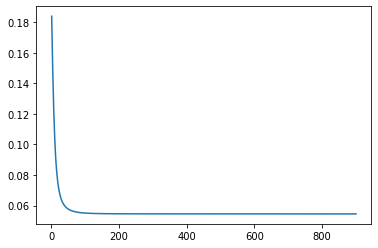

In [336]:
plt.plot(np.linspace(1,900,900),costn)

In [337]:
costn[-1]

0.054589172022115176

In [338]:
accuracy = (np.sum(1*(Y == predict(X,parameters)))/8)*100
print(accuracy)

87.5
